# 1. Exploration
Take a look at some historical data on the stock market.

In [1]:
# Data
import numpy as np
import pandas as pd
# Stats
from scipy import stats
# Viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import altair as alt
alt.renderers.enable('notebook')

### Check if overall market returns are normal

In [6]:
# These are the market returns from 1928 to 2017, inclusive
# Source: http://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/histretSP.html
returns = np.array([0.44,-0.08,-0.25,-0.44,-0.09,0.50,-0.01,0.47,0.32,-0.35,0.29,-0.01,-0.11,
           -0.13,0.19,0.25,0.19,0.36,-0.08,0.05,0.06,0.18,0.31,0.24,0.18,-0.01,0.53,
           0.33,0.07,-0.10,0.44,0.12,0.00,0.27,-0.09,0.23,0.16,0.12,-0.10,0.24,0.11,
           -0.08,0.04,0.14,0.19,-0.14,-0.26,0.37,0.24,-0.07,0.07,0.19,0.32,-0.05,0.20,
           0.22,0.06,0.31,0.18,0.06,0.17,0.31,-0.03,0.30,0.07,0.10,0.01,0.37,0.23,0.33,
           0.28,0.21,-0.09,-0.12,-0.22,0.28,0.11,0.05,0.16,0.05,-0.37,0.26,0.15,0.02,
           0.16,0.32,0.14,0.01,0.12,0.22])
return_df = pd.DataFrame({'year': range(1928, 2018), 'return': returns})

/home/eswan18/anaconda3/envs/ad_hoc/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


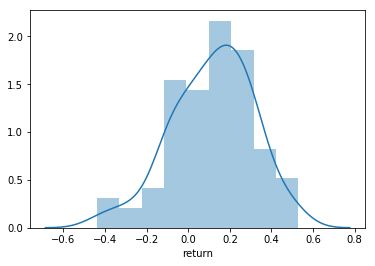

In [7]:
sns.distplot(return_df['return'])

Looks like a normal distribution. Let's test it. 

In [4]:
t, p = stats.shapiro(returns)
t, p

(0.983182430267334, 0.2977946698665619)

Evidently, according to my stats-savvier colleagues, this relatively high p-value means we can't reject the hypothesis that this distribution is normal. So that's good - we will proceed assuming this is normal.

We can entirely describe a normal distribution with just its mean and standard deviation. Let's get those and store them for later.

In [5]:
mu = returns.mean()
sigma = returns.std()
mu, sigma

(0.11544444444444443, 0.19544343376657383)

### Examine trends

Mean: 0.11544444444444443
Stdev: 0.19653836353133583


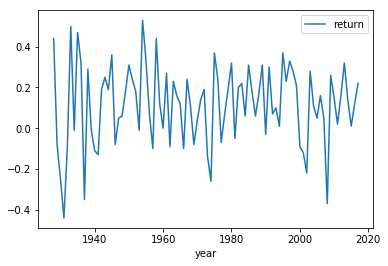

In [29]:
return_df.index = return_df['year'].astype(pd.datetime)
return_df.plot(y='return')
print('Mean: %s' % return_df['return'].mean())
print('Stdev: %s' % return_df['return'].std())

The data on largest stocks by year (from wikipedia) is only available starting in 1996. Does this period look meaningfully different from the entire data set?

Mean: 0.10454545454545455
Stdev: 0.17911760629016035


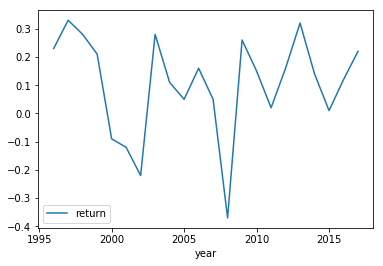

In [30]:
post_96 = return_df[return_df['year'] >= 1996]
post_96.plot(y='return')
print('Mean: %s' % post_96['return'].mean())
print('Stdev: %s' % post_96['return'].std())

The mean is very slightly lower and the stdev is very slightly higher, but it's similar enough that I'm willing to use this as a sample.